In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../src')

import pickle
import os
import pandas as pd
from utils import get_corr_table, get_weights
from classification import apply_classifiers_original_features, feature_selection_classification, apply_classifiers_with_random_features

dataset_name = 'orl'
num_dimensions = [1, 5, 25, 125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3500, 4000, 5000, 7500, 10304]

In [2]:
# Read the best parameters configuration for each of the dimensionality reduction techniques
reduced_X_best = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/reduced/reduced_X_best.pkl', 'rb'))

# Read processed data
X_train = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/processed/X_train.pkl', 'rb'))
X_test = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/processed/X_test.pkl', 'rb'))
y_train = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/processed/y_train.pkl', 'rb'))
y_test = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/processed/y_test.pkl', 'rb'))


# Calculate the correlation with the original features
# Calculate variation of each component
weights = get_weights(reduced_X_best, n_components=300)

# Calculate correlation with original features
df_corrs, df_corrs_avg = get_corr_table(reduced_X_best, X_train, abs=False, weighted=True, weights=weights)
df_corrs_avg = df_corrs_avg.reset_index()

# Get lists of features indices ordered by correlation
most_correlated_pixels = {}
for key in df_corrs_avg.keys()[1:]:
    most_correlated_pixels[key] = df_corrs_avg.sort_values(by=key, ascending=False)['index'].values


In [11]:
# Apply classifiers on the features selected by the techniques
feature_selection_classification(X_train, y_train, X_test, y_test, dataset_name, num_dimensions, df_corrs_avg, most_correlated_pixels)

SLMVP 10304 Dimensions: 100%|██████████| 21/21 [05:38<00:00, 16.11s/it]

Saved results to /results/feature_selection/orl_scores.csv


In [3]:
# Apply classifier on original data selecting features at random
apply_classifiers_with_random_features(X_train, X_test, y_train, y_test,
                                       num_iterations=4,
                                       num_dims=num_dimensions,
                                       size=10304,
                                       dataset_name=dataset_name)

  5%|▍         | 1/21 [00:00<00:02,  9.49it/s]

Iteration: 1


  5%|▍         | 1/21 [00:00<00:02,  8.65it/s]

Iteration: 2


  5%|▍         | 1/21 [00:00<00:02,  7.87it/s]

Iteration: 3


  5%|▍         | 1/21 [00:00<00:02,  8.17it/s]

Iteration: 4


100%|██████████| 21/21 [01:40<00:00,  4.79s/it]

Saved results to /results/feature_selection/orl_scores_random.csv


,Num Dimensions,SGD Score,SGD Score Train,SVC Score,SVC Score Train
0,1.0,0.03125,0.040278,0.10000,0.122222
1,5.0,0.15000,0.131250,0.35625,0.574306
2,25.0,0.23125,0.320833,0.83750,0.987500
3,125.0,0.25000,0.344444,0.93750,1.000000
4,250.0,0.59375,0.883333,0.94375,1.000000
5,500.0,0.82500,0.995833,0.96875,1.000000
6,750.0,0.88125,1.000000,0.96875,1.000000
7,1000.0,0.90000,1.000000,0.97500,1.000000
8,1250.0,0.90000,1.000000,0.97500,1.000000
9,1500.0,0.91875,1.000000,0.97500,1.000000


## Feature Selection Linechart

In [7]:
import numpy as np

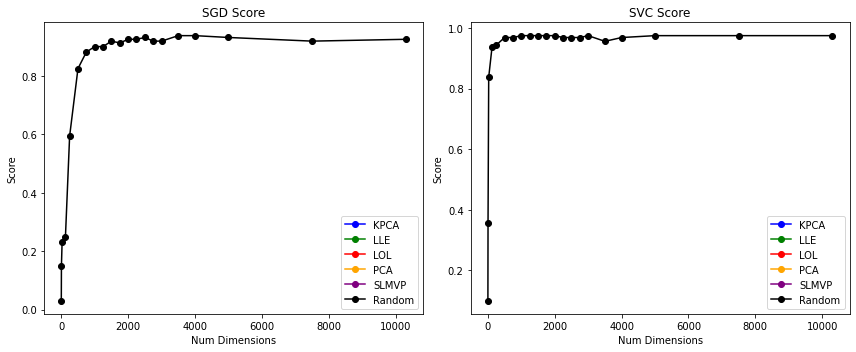

In [19]:
import matplotlib.pyplot as plt

# Read scores
scores_df = pd.read_csv(os.path.dirname(os.getcwd()) + f'/results/feature_selection/{dataset_name}_scores.csv', index_col=0)

# Read random scores
scores_random_df = pd.read_csv(os.path.dirname(os.getcwd()) + f'/results/feature_selection/{dataset_name}_scores_random.csv')

# Concatenate scores with random scores
scores_random_df['Dim Technique'] = 'Random'
scores_random_df = scores_random_df[['Dim Technique', 'Num Dimensions', 'SGD Score', 'SVC Score']]
scores_df = pd.concat([scores_df, scores_random_df])

# Define a colormap for different techniques
technique_colors = {'KPCA': 'blue', 'LLE': 'green', 'LOL': 'red', 'PCA': 'orange', 'SLMVP': 'purple', 'Random': 'black'}

# Create two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for SGD Score
for technique, color in technique_colors.items():
    subset_df = scores_df[scores_df['Dim Technique'] == technique]
    axs[0].plot(subset_df['Num Dimensions'], subset_df['SGD Score'], marker='o', linestyle='-', color=color, label=technique)

axs[0].set_title('SGD Score')
axs[0].set_xlabel('Num Dimensions')
axs[0].set_ylabel('Score')
axs[0].legend()

# Plot for SVC Score
for technique, color in technique_colors.items():
    subset_df = scores_df[scores_df['Dim Technique'] == technique]
    axs[1].plot(subset_df['Num Dimensions'], subset_df['SVC Score'], marker='o', linestyle='-', color=color, label=technique)

axs[1].set_title('SVC Score')
axs[1].set_xlabel('Num Dimensions')
axs[1].set_ylabel('Score')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [13]:
scores_df

,Num Dimensions,SGD Score,SGD Score Train,SVC Score,SVC Score Train,Dim Technique
LLE,1,0.07500,0.030556,0.125,0.138889,NaN
PCA,1,0.05000,0.036111,0.175,0.141667,NaN
SLMVP,1,0.05000,0.055556,0.175,0.158333,NaN
LLE,5,0.07500,0.086111,0.250,0.263889,NaN
PCA,5,0.05000,0.063889,0.225,0.188889,NaN
...,...,...,...,...,...,...
16,8500,0.94000,NaN,0.925,NaN,Random
17,9000,0.93125,NaN,0.925,NaN,Random
18,9500,0.92750,NaN,0.925,NaN,Random
19,10000,0.93250,NaN,0.925,NaN,Random
